In [3]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nice visuals
sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# 📥 Step 2: Load the Dataset

file_path = "SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry).csv"

df = pd.read_csv(file_path)

# Preview first few rows
df.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [5]:
# 🧹 Step 3: Initial Data Cleaning & Checks

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Drop completely empty columns if any
df = df.dropna(axis=1, how='all')

# Fix header rows mixed inside data: e.g., check for rows with header text
df = df[df["Supply Chain Emission Factors without Margins"] != "Supply Chain Emission Factors without Margins"]

# Convert numeric columns to proper numeric types
df["Supply Chain Emission Factors without Margins"] = pd.to_numeric(df["Supply Chain Emission Factors without Margins"], errors='coerce')
df["Supply Chain Emission Factors with Margins"] = pd.to_numeric(df["Supply Chain Emission Factors with Margins"], errors='coerce')


Shape: (264, 13)

Columns:
 ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [6]:
# ✅ Step 4: Handle Missing Values

# Check nulls
print(df.isnull().sum())

# Drop rows with any remaining critical nulls in main emission factor columns
df = df.dropna(subset=["Supply Chain Emission Factors with Margins", "Supply Chain Emission Factors without Margins"])

print("New Shape after dropping rows with nulls:", df.shape)


Industry Code                                             0
Industry Name                                             0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
dtype: int64
New Shape after dropping rows with nulls: (263, 12)


In [7]:
# 🧮 Step 5: Descriptive Statistics

df.describe(include="all")


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
count,263,263,263,263,263.000000,263.000000,263.000000,263.000000,263.0,263.0,263.000000,263.0
unique,66,66,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,113FF,"Forestry, fishing, and related activities",methane,"kg/2018 USD, purchaser price",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,4,66,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.078597,0.001897,0.080483,3.403042,2.0,1.0,2.806084,1.0
std,NaN,NaN,NaN,NaN,0.264294,0.007269,0.266251,0.556974,0.0,0.0,1.252646,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,2.0,1.0,1.000000,1.0
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000,2.0,1.0,1.000000,1.0
50%,NaN,NaN,NaN,NaN,0.002000,0.000000,0.002000,3.000000,2.0,1.0,3.000000,1.0
75%,NaN,NaN,NaN,NaN,0.039500,0.000000,0.039500,4.000000,2.0,1.0,4.000000,1.0


In [8]:
# 🔍 Step 6: Data Overview

df.info()

# Unique industries and substances
print("\nUnique industries:", df["Industry Name"].nunique())
print("Unique substances:", df["Substance"].unique())


<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 263
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Industry Code                                           263 non-null    object 
 1   Industry Name                                           263 non-null    object 
 2   Substance                                               263 non-null    object 
 3   Unit                                                    263 non-null    object 
 4   Supply Chain Emission Factors without Margins           263 non-null    float64
 5   Margins of Supply Chain Emission Factors                263 non-null    float64
 6   Supply Chain Emission Factors with Margins              263 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          263 non-null    int64  
 8   DQ TemporalCorrelation of Factors without Mar

C:\Users\hp\AppData\Local\Temp\ipykernel_1124\2224055640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_emissions.values, y=industry_emissions.index, palette="Reds_r")
C:\Users\hp\AppData\Local\Temp\ipykernel_1124\2224055640.py:10: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


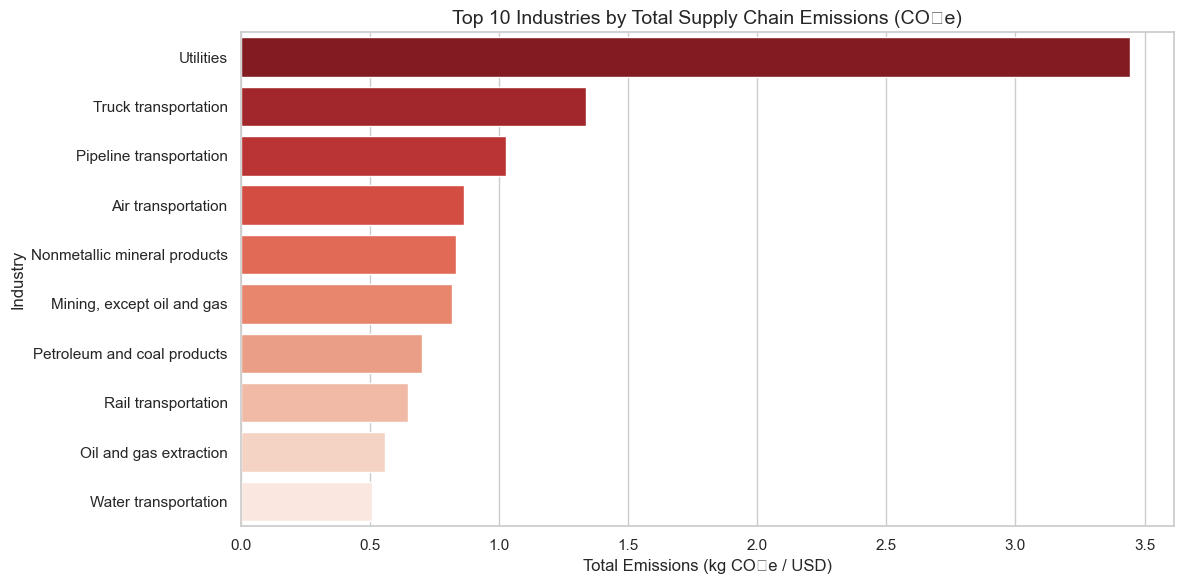

In [9]:
# 🎯 6.1: Top 10 Industries by Total Emissions (with margins)

industry_emissions = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=industry_emissions.values, y=industry_emissions.index, palette="Reds_r")
plt.title("Top 10 Industries by Total Supply Chain Emissions (CO₂e)", fontsize=14)
plt.xlabel("Total Emissions (kg CO₂e / USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


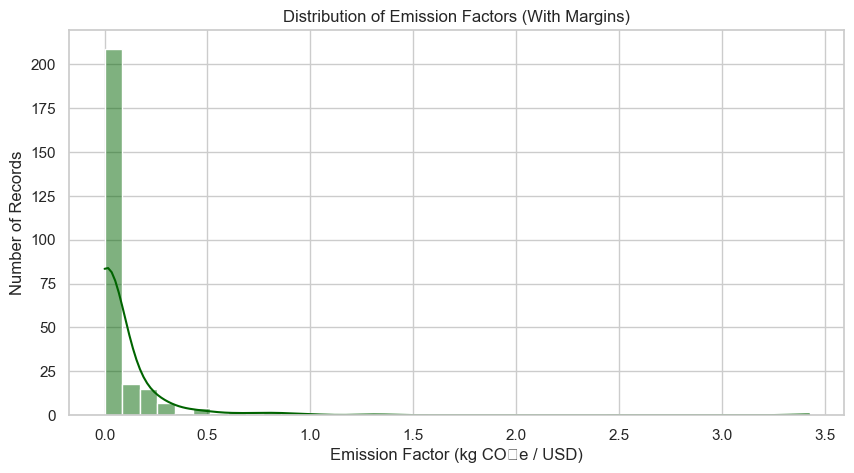

In [10]:
# 📈 6.2: Distribution of Emission Factors (With Margins)

plt.figure(figsize=(10,5))
sns.histplot(df["Supply Chain Emission Factors with Margins"], bins=40, kde=True, color="darkgreen")
plt.title("Distribution of Emission Factors (With Margins)")
plt.xlabel("Emission Factor (kg CO₂e / USD)")
plt.ylabel("Number of Records")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_1124\77459516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substance_emissions.values, y=substance_emissions.index, palette="coolwarm")
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


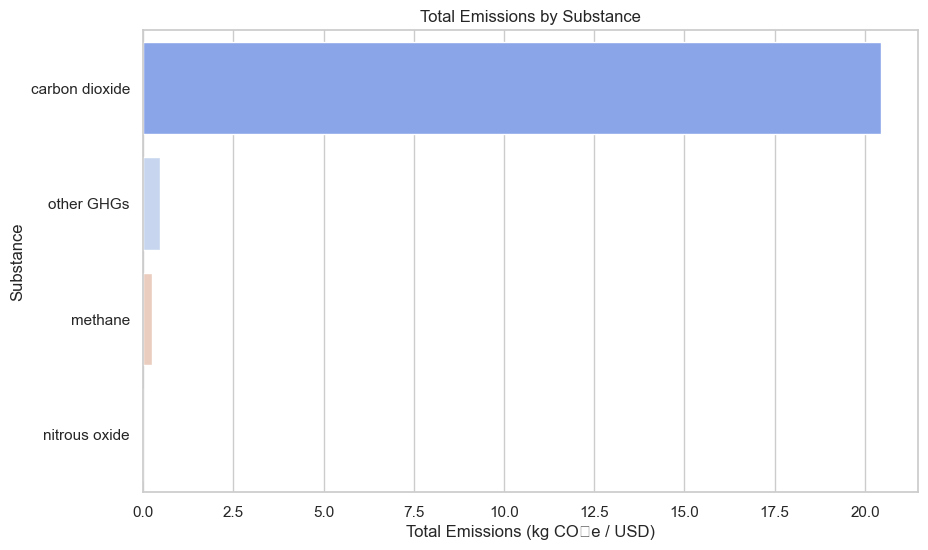

In [11]:
# 💨 6.3: Total Emissions by Substance

substance_emissions = df.groupby("Substance")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=substance_emissions.values, y=substance_emissions.index, palette="coolwarm")
plt.title("Total Emissions by Substance")
plt.xlabel("Total Emissions (kg CO₂e / USD)")
plt.ylabel("Substance")
plt.show()


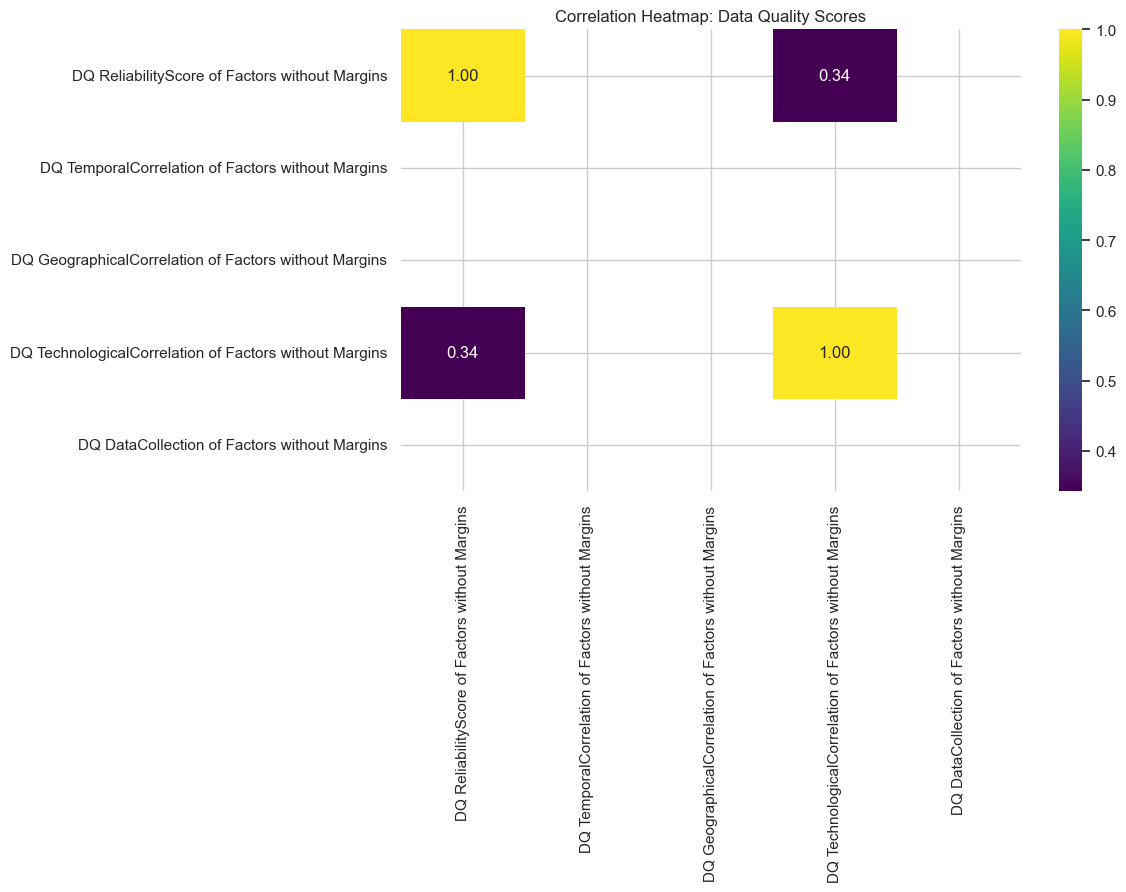

In [12]:
# 🔗 6.4: Correlation Heatmap of Data Quality Scores (Optional)

# Identify DQ columns
dq_cols = [col for col in df.columns if "DQ" in col]

if dq_cols:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[dq_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
    plt.title("Correlation Heatmap: Data Quality Scores")
    plt.show()
else:
    print("No DQ columns found for correlation heatmap.")


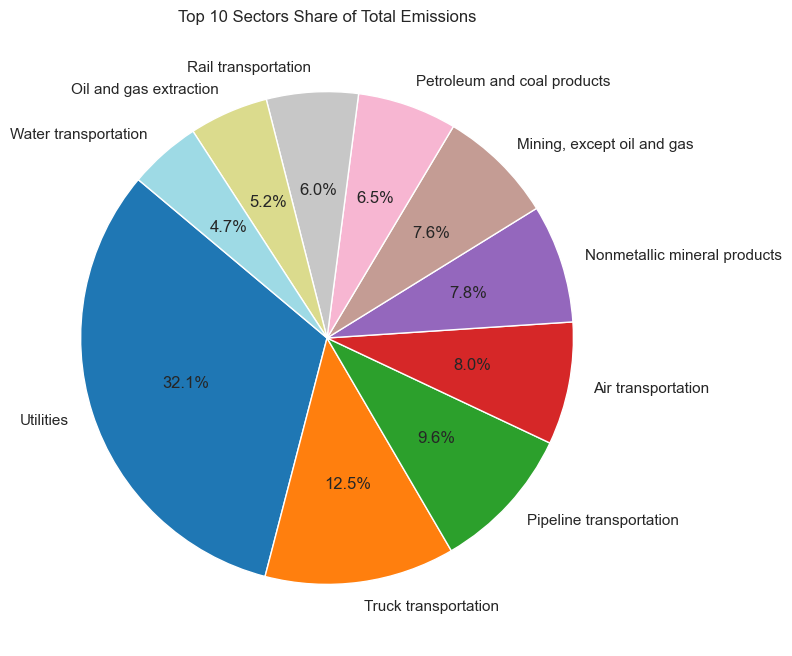

In [13]:
# 🥧 6.5: Top 10 Sectors Share (Pie Chart)

industry_emissions = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
industry_emissions[:10].plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Top 10 Sectors Share of Total Emissions")
plt.ylabel("")
plt.show()
